# 1 Regressão Linear com uma Variável

In [14]:
import numpy as np  
import pandas as pd  
import matplotlib.pyplot as plt  
%matplotlib inline

In [15]:
x_label = 'Populacao x (10.000)'
y_label = 'Lucro x 10.000'

# Carregar dados
data = pd.read_csv('data/ex1data1.txt', header=None, names=[x_label, y_label])  
data.head() 

,Populacao x (10.000),Lucro x 10.000
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


## 1.1 Visualização dos Dados

Gerando um gráfico de dispersão usando a biblioteca Matplotlib

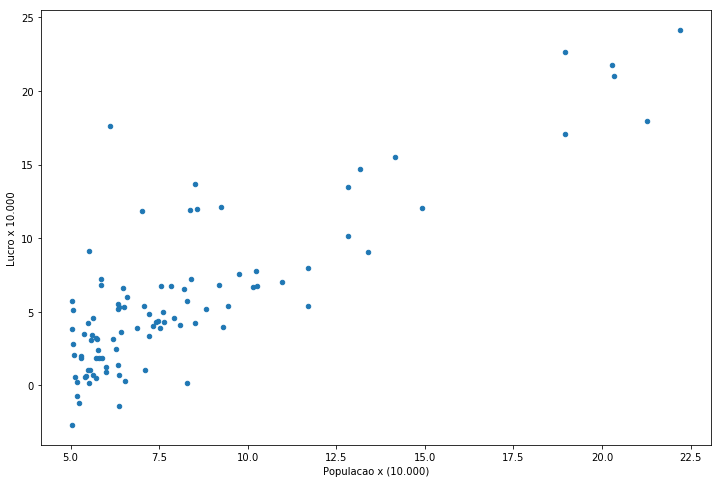

In [16]:
data.plot(kind='scatter', x=x_label, y=y_label, figsize=(12,8))  

## 1.2 Gradiente Descendente

In [17]:
def computarCusto(X, y, theta):
    inner = np.power(((X * theta.T) - y), 2)
    return np.sum(inner) / (2 * len(X))

In [18]:
# append a ones column to the front of the data set
data.insert(0, 'Ones', 1)
# set X (training data) and y (target variable)
cols = data.shape[1]  
X = data.iloc[:,0:cols-1]  
y = data.iloc[:,cols-1:cols] 


# convert from data frames to numpy matrices
X = np.matrix(X.values)  
y = np.matrix(y.values)  
theta = np.matrix(np.array([0,0]))
# set X (training data) and y (target variable)
cols = data.shape[1]  
X = data.iloc[:,0:cols-1]  
y = data.iloc[:,cols-1:cols] 


# convert from data frames to numpy matrices
X = np.matrix(X.values)  
y = np.matrix(y.values)  
theta = np.matrix(np.array([0,0]))  

X.shape, theta.shape, y.shape  

((97, 2), (1, 2), (97, 1))

In [19]:
computarCusto(X, y, theta)

32.072733877455676

In [20]:
def gradiente_descendente(X, y, theta, alpha, iters):  
    temp = np.matrix(np.zeros(theta.shape))
    parameters = int(theta.ravel().shape[1])
    cost = np.zeros(iters)

    for i in range(iters):
        error = (X * theta.T) - y

        for j in range(parameters):
            term = np.multiply(error, X[:,j])
            temp[0,j] = theta[0,j] - ((alpha / len(X)) * np.sum(term))

        theta = temp
        cost[i] = computarCusto(X, y, theta)

    return theta, cost

In [21]:
# initialize variables for learning rate and iterations
alpha = 0.01  
iters = 1000

# perform gradient descent to "fit" the model parameters
g, cost = gradiente_descendente(X, y, theta, alpha, iters)  
g  

matrix([[-3.24140214,  1.1272942 ]])

In [22]:
computarCusto(X, y, g)  

4.5159555030789118

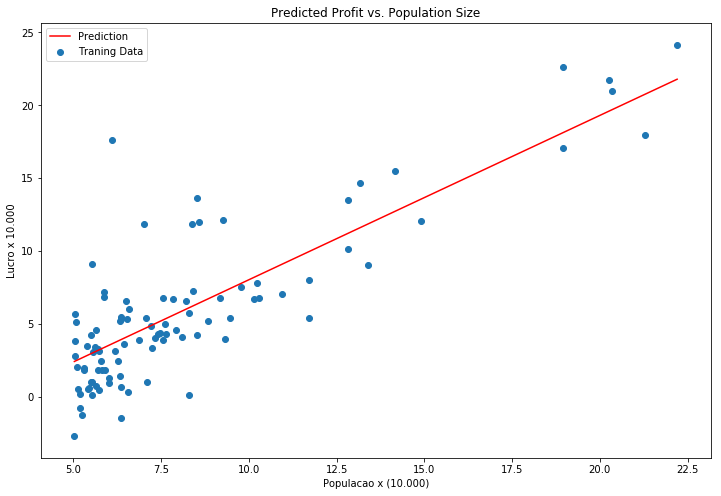

In [23]:
x = np.linspace(data[x_label].min(), data[x_label].max(), 100)  
f = g[0, 0] + (g[0, 1] * x)

fig, ax = plt.subplots(figsize=(12,8))  
ax.plot(x, f, 'r', label='Prediction')  
ax.scatter(data[x_label], data[y_label], label='Traning Data')  
ax.legend(loc=2)  
ax.set_xlabel(x_label)  
ax.set_ylabel(y_label)  
ax.set_title('Predicted Profit vs. Population Size') 

In [36]:
#number of training samples
m = y.size

it = np.ones(shape=(m, 2))
it[:, 1] = X[:,]

#Grid over which we will calculate J
theta0_vals = np.linspace(-10, 10, 100)
theta1_vals = np.linspace(-1, 4, 100)


#initialize J_vals to a matrix of 0's
J_vals = np.zeros(shape=(theta0_vals.size, theta1_vals.size))

#Fill out J_vals
for t1, element in enumerate(theta0_vals):
    for t2, element2 in enumerate(theta1_vals):
        thetaT = np.zeros(shape=(2, 1))        
        thetaT[0][0] = element
        thetaT[1][0] = element2
        thetaT = np.matrix(thetaT.T)
        J_vals[t1, t2] = computarCusto(it, y, thetaT)



        
#Contour plot
J_vals = J_vals.T

plt.figure(figsize=(12,8))

#Plot J_vals as 15 contours spaced logarithmically between 0.01 and 100
plt.contour(theta0_vals, theta1_vals, J_vals, logspace(-2, 3, 20))
plt.xlabel('theta_0')
plt.ylabel('theta_1')
plt.show()

ValueError: could not broadcast input array from shape (97,2) into shape (97)

In [30]:
X

matrix([[  1.    ,   6.1101],
        [  1.    ,   5.5277],
        [  1.    ,   8.5186],
        [  1.    ,   7.0032],
        [  1.    ,   5.8598],
        [  1.    ,   8.3829],
        [  1.    ,   7.4764],
        [  1.    ,   8.5781],
        [  1.    ,   6.4862],
        [  1.    ,   5.0546],
        [  1.    ,   5.7107],
        [  1.    ,  14.164 ],
        [  1.    ,   5.734 ],
        [  1.    ,   8.4084],
        [  1.    ,   5.6407],
        [  1.    ,   5.3794],
        [  1.    ,   6.3654],
        [  1.    ,   5.1301],
        [  1.    ,   6.4296],
        [  1.    ,   7.0708],
        [  1.    ,   6.1891],
        [  1.    ,  20.27  ],
        [  1.    ,   5.4901],
        [  1.    ,   6.3261],
        [  1.    ,   5.5649],
        [  1.    ,  18.945 ],
        [  1.    ,  12.828 ],
        [  1.    ,  10.957 ],
        [  1.    ,  13.176 ],
        [  1.    ,  22.203 ],
        [  1.    ,   5.2524],
        [  1.    ,   6.5894],
        [  1.    ,   9.2482],
        [ 